In [1]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("age_wt_bfat.csv" , nrows = 600)
data

#https://github.com/sukha002/Public-Regression-Datasets

,Index,Wt,Age,Blood_fat
0,1,84,46,354
1,2,73,20,190
2,3,65,52,405
3,4,70,30,263
4,5,76,57,451
5,6,69,25,302
6,7,63,28,288
7,8,72,36,385
8,9,79,57,402
9,10,75,44,365


In [3]:
"""
data = data.iloc[:, :-1]
data = data[["Precip Type",	"Temperature (C)",	"Apparent Temperature (C)",	"Humidity",	"Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",
"Loud Cover",	"Pressure (millibars)"]]
"""

'\ndata = data.iloc[:, :-1]\ndata = data[["Precip Type",\t"Temperature (C)",\t"Apparent Temperature (C)",\t"Humidity",\t"Wind Speed (km/h)",\t"Wind Bearing (degrees)",\t"Visibility (km)",\n"Loud Cover",\t"Pressure (millibars)"]]\n'

In [4]:
#data = data.drop("id", axis=1)

In [5]:
from sklearn import preprocessing 
#make an instance of Label Encoder
"""
label_encoder = preprocessing.LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["children"] = label_encoder.fit_transform(data["children"])
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data["region"] = label_encoder.fit_transform(data["region"])
data.head()

"""

'\nlabel_encoder = preprocessing.LabelEncoder()\ndata["sex"] = label_encoder.fit_transform(data["sex"])\ndata["children"] = label_encoder.fit_transform(data["children"])\ndata["smoker"] = label_encoder.fit_transform(data["smoker"])\ndata["region"] = label_encoder.fit_transform(data["region"])\ndata.head()\n\n'

In [6]:
X = data.iloc[: , 0:-1]
#print(X)
y = data.iloc[: , -1]
#print(y)
print(data.shape)
print(X.shape)
print(y.shape)

(25, 4)
(25, 3)
(25,)


In [7]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

# standardization 
X = object.fit_transform(X) 
#y = object.fit_transform(y) 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

array([[-0.97072534,  0.02566186, -1.17656209],
       [-1.38675049, -0.29511139,  1.07323794],
       [ 0.        , -0.29511139,  1.07323794],
       [ 0.41602515,  0.02566186,  0.73993423],
       [-1.24807544,  0.10585517, -0.75993245],
       [-1.10940039,  0.58701505,  1.48986757],
       [ 1.10940039, -0.77627127,  0.57328238],
       [ 0.69337525,  0.82759499,  0.98991201],
       [ 1.24807544, -0.13472477, -1.34321394],
       [ 0.83205029,  0.50682174,  0.90658608],
       [ 1.66410059, -0.45549802, -0.75993245],
       [-0.69337525,  0.2662418 , -0.25997689],
       [-0.2773501 , -3.34245728, -1.25988801],
       [ 0.2773501 , -0.77627127,  1.73984535],
       [ 0.97072534,  1.06817493, -0.42662875],
       [-0.83205029, -0.45549802, -0.92658431]])

## Experiment 1

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7966260536492977
Coefficient [-31.2699329    8.74309249  59.75270143]
Intercept 316.5602952997264


### Poly

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(y_pred)


from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

[346. 220. 405. 311. 209. 385. 181. 302. 311.]


<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

### Error Rate

In [15]:
error = errors_lr, errors_pr, errors_dt, errors_rf, errors_sm
error =  {"name": ["LR", "Ply", "DT", "RF" , "SVM"], "Error": error} 
error = pd.DataFrame(error) 
error



,name,Error
0,LR,33.173692
1,Ply,33.173692
2,DT,48.666667
3,RF,29.514556
4,SVM,55.805163


In [16]:
error1 = list(error)

In [17]:
error1

['name', 'Error']

In [18]:
# importing the pandas library
import pandas as pd
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error = {"Attr": "Error", "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

#column_name = [name, error1]
error = pd.DataFrame([error])
error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163


## Cross Validation when n_split = 2

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
scores  
y_pred_1 =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred_1)
errors_lr

kf = KFold(n_splits=2)

from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.8094921716261154
Coefficient [-3.33826746  8.92881514 59.72448061]
Intercept 325.87681497749224


In [21]:
errors_lr

45.28716290814743

In [22]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [26]:
import pandas as pd
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": "CL_2", "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452


## Cross Vaidation when N splits = 5

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7445188484671843
Coefficient [-23.36358744   3.50654781  62.8047322 ]
Intercept 309.319070926846


In [29]:
errors_lr

15.008346245196673

In [30]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
#print(y_pred)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

#fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

### Random Forest 

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [34]:
import pandas as pd
var = "CV_5"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159


## Cross Validation when k-folds is 10

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
scores  
y_pred_1 =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred_1)
errors_lr

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7809350595390103
Coefficient [-24.4926479    3.85351964  63.42083831]
Intercept 308.40661744738765


In [37]:
errors_lr

28.917281907654456

In [38]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [42]:
var = "kfolds_is_10"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121


## LeaveOneOut Cross Validation

In [43]:
## import numpy as np
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7754270468716035
Coefficient [-22.36414619   2.57252668  63.67502101]
Intercept 309.8843048092587


In [45]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [49]:
import pandas as pd
var = "LeaveOneOut"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121
4,LeaveOneOut,20.892380,20.892380,24.000000,3.816000,58.549001


## Repeated K-Fold Cross-Validation when n = 2

In [50]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7764482823530456
Coefficient [-20.33723252   0.77156204  63.69019138]
Intercept 311.8897094126672


In [52]:
errors_lr

27.890978285349178

In [53]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(y_pred)


from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

[302. 302. 451. 385. 220. 311. 346. 254. 374. 254. 374. 254.]


<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [57]:
var = "RepeatedKFold_is_2"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121
4,LeaveOneOut,20.892380,20.892380,24.000000,3.816000,58.549001
5,RepeatedKFold_is_2,27.890978,27.890978,53.916667,34.609583,63.315447


## Repeated K-Fold Cross-Validation when n = 5

In [58]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7442967621900394
Coefficient [-1.92182801e+01  9.11870429e-03  6.19564516e+01]
Intercept 311.92890452366197


In [60]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [63]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [64]:
var = "RepeatedKFold_is_5"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121
4,LeaveOneOut,20.892380,20.892380,24.000000,3.816000,58.549001
5,RepeatedKFold_is_2,27.890978,27.890978,53.916667,34.609583,63.315447
6,RepeatedKFold_is_5,25.375803,25.375803,41.400000,40.535200,69.333743


## Repeated K-Fold Cross-Validation when n = 10

In [65]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7534542315533194
Coefficient [-19.98714463   1.57219405  62.63016363]
Intercept 310.898899495942


In [67]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [68]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [70]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [71]:
var = "RepeatedKFold_is_10"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}
error = error._append(error1, ignore_index=True)
error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121
4,LeaveOneOut,20.892380,20.892380,24.000000,3.816000,58.549001
5,RepeatedKFold_is_2,27.890978,27.890978,53.916667,34.609583,63.315447
6,RepeatedKFold_is_5,25.375803,25.375803,41.400000,40.535200,69.333743
7,RepeatedKFold_is_10,18.379669,18.379669,66.500000,58.167500,68.029070


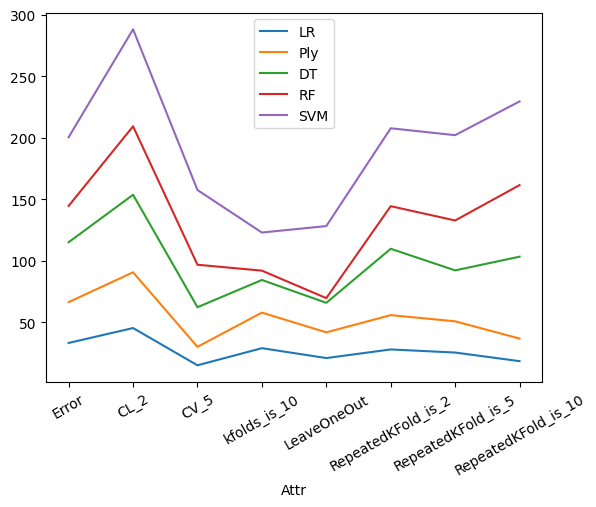

In [72]:
#plt = error.plot( title="SeriesGroupBy Plot")

# Plot unstacked multiple columns such as population and year from DataFrame
plt = error.plot(x="Attr", stacked=True, rot=30)

In [73]:
error

,Attr,LR,Ply,DT,RF,SVM
0,Error,33.173692,33.173692,48.666667,29.514556,55.805163
1,CL_2,45.287163,45.287163,63.000000,55.646583,78.831452
2,CV_5,15.008346,15.008346,32.200000,34.515400,60.700159
3,kfolds_is_10,28.917282,28.917282,26.500000,7.591500,30.978121
4,LeaveOneOut,20.892380,20.892380,24.000000,3.816000,58.549001
5,RepeatedKFold_is_2,27.890978,27.890978,53.916667,34.609583,63.315447
6,RepeatedKFold_is_5,25.375803,25.375803,41.400000,40.535200,69.333743
7,RepeatedKFold_is_10,18.379669,18.379669,66.500000,58.167500,68.029070
